In [1]:
from itertools import combinations
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import upsetplot

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [21]:
outpath = "output/supplemental_figures_revision/"

In [2]:
# first_sets = [set([1]),set([1,2,3]),set([1,4,5,2])]
# names = ["a","b","c"]

def get_input_upset(first_sets, names):
  name_dict = {x : n for n, x in zip(names, range(len(names)))}

  data = []
  sets = []
  full_sets = []
  # def setup_upset(sets, names):
  for i in reversed(range(len(first_sets) + 1)):
    perms = combinations(range(len(names)),i)

    for p in perms:
      sets.append([name_dict[x] for x in p])
      complement = [first_sets[x] for x in range(len(names)) if x not in p]
      ingroup = [first_sets[x] for x in p]

      if len(ingroup) > 0:
        temp_set = set.intersection(*ingroup)
      else:
        temp_set = set()
      if len(complement) > 0:
        temp_set -= set.union(*complement)
      data.append(len(temp_set))
      full_sets.append(temp_set)
  return sets, data, full_sets


In [13]:
tenx_datanames = ["HLCA4_P2_10x_with_postprocessing_lung", "HLCA4_P3_10x_with_postprocessing_lung"]
ss2_datanames = ["HLCA_smartseq_P2_with_postprocessing","HLCA_smartseq_P3_with_postprocessing"]

tenx_names = ["Ind. 1 10x", "Ind. 2 10x"]
ss2_names = ["Ind. 1 SS2", "Ind. 2 SS2"]

In [4]:
inpath = "../data/"

# number of cell types for each technology

In [5]:
tenx_freeann = set()
tenx_freeann_sets = []
for tenx_dataname in tqdm(tenx_datanames):
  df = pd.read_parquet(inpath + tenx_dataname + ".pq",columns=["free_annotation"])
  tenx_freeann.update(df["free_annotation"])
  tenx_freeann_sets.append(set(df["free_annotation"]))

100%|██████████| 2/2 [00:29<00:00, 14.78s/it]


In [6]:
ss2_freeann_sets = []
ss2_freeann = set()
for ss2_dataname in tqdm(ss2_datanames):
  df = pd.read_parquet(inpath + ss2_dataname + ".pq",columns=["free_annotation"])
  ss2_freeann.update(df["free_annotation"])
  ss2_freeann_sets.append(set(df["free_annotation"]))

100%|██████████| 2/2 [00:13<00:00,  6.52s/it]


In [7]:
print("num 10x: {}\nnum ss2: {}\nlen inter: {}".format(len(tenx_freeann), len(ss2_freeann), len(tenx_freeann.intersection(ss2_freeann))))

num 10x: 55
num ss2: 39
len inter: 37


In [15]:
sets, data, full_sets = get_input_upset(tenx_freeann_sets + ss2_freeann_sets, tenx_names + ss2_names)

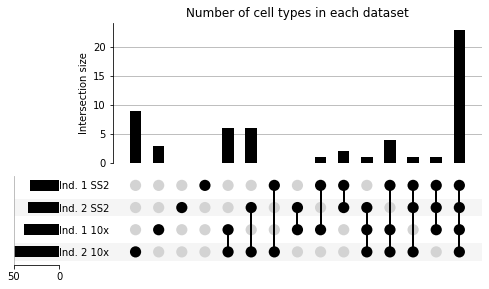

In [22]:
upset_input = upsetplot.from_memberships(sets[:-1],data=data[:-1])
upsetplot.plot(upset_input)
# plt.yscale("log")
plt.title("Number of cell types in each dataset")
plt.savefig("{}num_celltypes_upset.pdf".format(outpath),format="pdf")
plt.show()

## number of junctions

In [23]:
inpath2 = "../scripts/output/rijk_zscore/"
tenx_junctions = set()
tenx_junction_sets = []
for tenx_dataname in tqdm(tenx_datanames):
  df = pd.read_parquet(inpath2 + tenx_dataname + "_sym_SVD_normdonor_S_0.1_z_0.0_b_5.pq",columns=["refName_newR1"])
  tenx_junction_sets.append(set(df["refName_newR1"]))
  tenx_junctions.update(df["refName_newR1"])
#   break

100%|██████████| 2/2 [00:05<00:00,  2.63s/it]


In [24]:
ss2_junction_sets = []
ss2_junctions = set()
for ss2_dataname in tqdm(ss2_datanames):
  df = pd.read_parquet(inpath2 + ss2_dataname + "_sym_SVD_normdonor_S_0.1_z_0.0_b_5.pq",columns=["refName_newR1"])
  ss2_junctions.update(df["refName_newR1"])
  ss2_junction_sets.append(set(df["refName_newR1"]))

100%|██████████| 2/2 [00:20<00:00, 10.22s/it]


In [25]:
print("num 10x: {}\nnum ss2: {}\nlen inter: {}".format(len(tenx_junctions), len(ss2_junctions), len(tenx_junctions.intersection(ss2_junctions))))

num 10x: 25129
num ss2: 443987
len inter: 15547


In [26]:
sets, data, full_sets = get_input_upset(tenx_junction_sets + ss2_junction_sets, tenx_names + ss2_names)

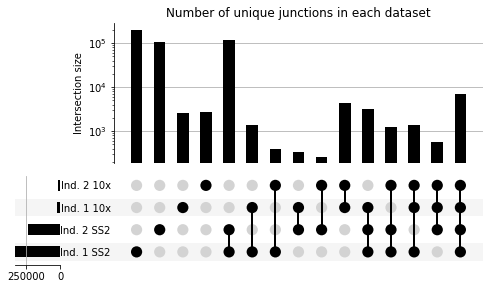

In [28]:
upset_input = upsetplot.from_memberships(sets[:-1],data=data[:-1])
upsetplot.plot(upset_input)
plt.yscale("log")
plt.title("Number of unique junctions in each dataset")
plt.savefig("{}num_junctions_upset.pdf".format(outpath),format="pdf")
plt.show()

## Number of cells in each dataset

In [29]:
num_cells_tenx = []
for tenx_dataname in tqdm(tenx_datanames):
  df = pd.read_parquet(inpath + tenx_dataname + ".pq",columns=["cell"])
  num_cells_tenx.append(df["cell"].nunique())


100%|██████████| 2/2 [00:25<00:00, 12.97s/it]


In [30]:
num_cells_ss2 = []
for tenx_dataname in tqdm(ss2_datanames):
  df = pd.read_parquet(inpath + ss2_dataname + ".pq",columns=["cell"])
  num_cells_ss2.append(df["cell"].nunique())


100%|██████████| 2/2 [00:05<00:00,  2.88s/it]


In [31]:
num_cells_tenx

[28793, 24676]

In [32]:
num_cells_ss2

[2845, 2845]

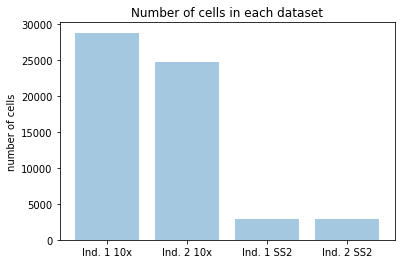

In [39]:
plt.bar(tenx_names + ss2_names, num_cells_tenx + num_cells_ss2, alpha = 0.4)
plt.ylabel("number of cells")
plt.title("Number of cells in each dataset")
plt.savefig("{}num_cells_upset.pdf".format(outpath),format="pdf")
plt.show()